# Project - Automating Crypto Website API Pull

In [43]:
# Import libraries
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Connection to Crypto Website API
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '62062234-6499-4b30-bf96-f258e2132270',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-28T14:26:53.873Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9874}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11791, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [7]:
type(data)

dict

In [19]:
# Show all requested rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [21]:
# Create a Dataframe from the API json data
df = pd.json_normalize(data["data"])

# Create a date column in the end of the dataframe with the current time
df["timestamp"] = pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11791,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977425e+07,1.977425e+07,False,NaN,1,NaN,NaN,None,2024-10-28T14:17:00.000Z,68939.715073,2.641820e+10,72.6595,-0.076763,2.028009,2.209642,4.968958,13.585148,3.808133,1.363231e+12,58.4827,1.447734e+12,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
1,1027,Ethereum,ETH,ethereum,9458,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204033e+08,1.204033e+08,True,NaN,2,NaN,NaN,None,2024-10-28T14:17:00.000Z,2521.024907,1.397803e+10,35.0524,-0.235239,1.402062,-5.942423,-5.637086,-1.928579,-24.278685,3.035397e+11,13.0219,3.035397e+11,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
2,825,Tether USDt,USDT,tether,101697,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.203393e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-28T14:17:00.000Z,0.999353,4.944487e+10,45.7443,0.053583,0.066799,0.011128,-0.076766,-0.099300,-0.060451,1.202615e+11,5.1597,1.212594e+11,None,2024-10-28T14:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-28 15:21:01.665221
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459311e+08,1.459311e+08,False,NaN,4,NaN,NaN,None,2024-10-28T14:17:00.000Z,594.684826,1.526030e+09,11.2947,-0.114244,1.563389,-0.455805,-1.173837,9.637315,3.671143,8.678299e+10,3.7230,8.678299e+10,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.702865e+08,5.874006e+08,True,NaN,5,NaN,NaN,None,2024-10-28T14:17:00.000Z,174.884750,2.926263e+09,26.5451,-1.222071,-0.681135,6.961125,11.094054,20.069963,-2.946091,8.224593e+10,3.5284,1.027274e+11,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
5,3408,USDC,USDC,usd-coin,22689,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.468790e+10,3.468790e+10,False,NaN,6,NaN,NaN,None,2024-10-28T14:17:00.000Z,1.000241,5.449510e+09,62.3006,0.028006,0.032812,0.051326,0.033333,0.015392,0.016994,3.469628e+10,1.4883,3.469628e+10,None,2024-10-28T14:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-28 15:21:01.665221
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-28T14:17:00.000Z,0.517547,7.070077e+08,34.5754,-0.392768,0.570865,-4.971557,-17.014164,-10.001907,-16.740438,2.940283e+10,1.2612,5.175474e+10,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465557e+11,1.465557e+11,True,NaN,8,NaN,NaN,None,2024-10-28T14:16:00.000Z,0.147380,1.895416e+09,122.1738,-0.117467,5.743096,3.834060,16.362795,44.557034,15.375215,2.159937e+10,0.9269,2.159937e+10,None,2024-10-28T14:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.648061e+10,8.6480

In [21]:
# Pull a list over the 15 top crypto currencies and add them as a table format with the current time as a new column to our existing table
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '62062234-6499-4b30-bf96-f258e2132270',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Create a Dataframe from the API json data
    df = pd.json_normalize(data["data"])
    
    # Create a new Date column in the end with the current time
    df["timestamp"] = pd.to_datetime("now")
    df

    # If the csv file does not exist, create it, otherwise add to it 
    if not os.path.isfile(r"C:\Users\lucas\Desktop\Software_Development\Data Analytics projects\Python\Projects\Automating Crypto Website API Pull\API_data.csv"):
        df.to_csv(r"C:\Users\lucas\Desktop\Software_Development\Data Analytics projects\Python\Projects\Automating Crypto Website API Pull\API_data.csv", header="column_names")
    else:
        df.to_csv(r"C:\Users\lucas\Desktop\Software_Development\Data Analytics projects\Python\Projects\Automating Crypto Website API Pull\API_data.csv", mode="a", header=False)

In [23]:
# Run api_runner on intervals
import os
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print("API Runner completed successfully")
    sleep(10)
exit()

{'status': {'timestamp': '2024-10-26T14:43:19.280Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 9863}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11788, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [27]:
# Showcase the csv file as a dataframe
df10 = pd.read_csv(r"C:\Users\lucas\Desktop\Software_Development\Data Analytics\Python\Projects\Automating Crypto Website API Pull\API_data.csv")
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.977326e+07,1.977326e+07,False,NaN,1,NaN,NaN,NaN,2024-10-26T14:41:00.000Z,66713.201314,3.691964e+10,20.7067,-0.420154,-2.620121,-2.277410,2.894551,7.452766,-1.635609,1.319138e+12,58.2121,1.400977e+12,NaN,2024-10-26T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:43:21.261287
1,1,1027,Ethereum,ETH,ethereum,9450,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203993e+08,1.203993e+08,True,NaN,2,NaN,NaN,NaN,2024-10-26T14:41:00.000Z,2451.839619,2.071299e+10,23.6336,-0.788786,-3.820909,-7.331264,-6.873060,-5.780846,-25.045114,2.951997e+11,13.0268,2.951997e+11,NaN,2024-10-26T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:43:21.261287
2,2,825,Tether USDt,USDT,tether,101582,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.203045e+11,1.213379e+11,True,NaN,3,NaN,NaN,NaN,2024-10-26T14:41:00.000Z,0.998608,7.283207e+10,27.8821,-0.020514,-0.084791,-0.118516,-0.156417,-0.124216,-0.152565,1.201370e+11,5.3015,1.211690e+11,NaN,2024-10-26T14:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-26 16:43:21.261287
3,3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459312e+08,1.459312e+08,False,NaN,4,NaN,NaN,NaN,2024-10-26T14:41:00.000Z,579.671079,1.696992e+09,12.4247,-0.425305,-2.356275,-2.966250,-2.839877,4.535520,-0.028229,8.459207e+10,3.7330,8.459207e+10,NaN,2024-10-26T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:43:21.261287
4,4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.701955e+08,5.872577e+08,True,NaN,5,NaN,NaN,NaN,2024-10-26T14:41:00.000Z,167.518274,4.655078e+09,37.3329,-0.812407,-4.932314,7.694693,8.273799,7.869211,-9.214005,7.876633e+10,3.4759,9.837640e+10,NaN,2024-10-26T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:43:21.261287
5,5,3408,USDC,USDC,usd-coin,22671,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.468629e+10,3.468629e+10,False,NaN,6,NaN,NaN,NaN,2024-10-26T14:41:00.000Z,0.999768,9.187101e+09,32.7030,-0.021690,-0.024779,-0.008442,-0.030474,-0.015004,-0.027465,3.467824e+10,1.5311,3.467824e+10,NaN,2024-10-26T14:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-26 16:43:21.261287
6,6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,NaN,2024-10-26T14:41:00.000Z,0.508690,1.285111e+09,59.7828,-0.835828,-3.354395,-6.632121,-13.994966,-14.249506,-15.219864,2.889962e+10,1.2753,5.086899e+10,NaN,2024-10-26T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:43:21.261287
7,7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.465288e+11,1.465288e+11,True,NaN,8,NaN,NaN,NaN,2024-10-26T14:41:00.000Z,0.133227,1.342387e+09,12.9893,-0.795379,-4.032868,-8.152768,15.501718,27.246099,2.746910,1.952165e+10,0.8617,1.952165e+10,NaN,2024-10-26T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:43:21.261287
8,8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer..

In [29]:
# Show the first 5 decimals of each value
pd.set_option("display.float_format", lambda x: "%.5f" % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11791,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19774253.00000,19774253.00000,False,NaN,1,NaN,NaN,None,2024-10-28T14:17:00.000Z,68939.71507,26418195511.60465,72.65950,-0.07676,2.02801,2.20964,4.96896,13.58515,3.80813,1363231367601.25366,58.48270,1447734016532.83008,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
1,1027,Ethereum,ETH,ethereum,9458,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120403276.30720,120403276.30720,True,NaN,2,NaN,NaN,None,2024-10-28T14:17:00.000Z,2521.02491,13978026423.82042,35.05240,-0.23524,1.40206,-5.94242,-5.63709,-1.92858,-24.27869,303539658432.65350,13.02190,303539658432.65002,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
2,825,Tether USDt,USDT,tether,101697,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120339320856.06236,121337925862.68210,True,NaN,3,NaN,NaN,None,2024-10-28T14:17:00.000Z,0.99935,49444868306.28291,45.74430,0.05358,0.06680,0.01113,-0.07677,-0.09930,-0.06045,120261489403.39804,5.15970,121259448545.66000,None,2024-10-28T14:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-28 15:21:01.665221
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931060.68944,145931060.68944,False,NaN,4,NaN,NaN,None,2024-10-28T14:17:00.000Z,594.68483,1526030117.68768,11.29470,-0.11424,1.56339,-0.45580,-1.17384,9.63731,3.67114,86782987396.65669,3.72300,86782987396.66000,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470286484.52653,587400579.90098,True,NaN,5,NaN,NaN,None,2024-10-28T14:17:00.000Z,174.88475,2926262621.23632,26.54510,-1.22207,-0.68113,6.96112,11.09405,20.06996,-2.94609,82245934327.59903,3.52840,102727403631.78000,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
5,3408,USDC,USDC,usd-coin,22689,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34687902229.72330,34687902229.72330,False,NaN,6,NaN,NaN,None,2024-10-28T14:17:00.000Z,1.00024,5449510114.74078,62.30060,0.02801,0.03281,0.05133,0.03333,0.01539,0.01699,34696278866.32629,1.48830,34696278866.33000,None,2024-10-28T14:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-28 15:21:01.665221
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56811862950.00000,99987068281.00000,False,NaN,7,NaN,NaN,None,2024-10-28T14:17:00.000Z,0.51755,707007711.67908,34.57540,-0.39277,0.57087,-4.97156,-17.01416,-10.00191,-16.74044,29402830381.40667,1.26120,51754737223.25000,None,2024-10-28T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-28 15:21:01.665221
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146555746383.70526,146555746383.70526,True,NaN,8,NaN,NaN,None,2024-10-28T14:16:00.000Z,0.14738,1895416311.71530,122.17380,-0.11747,5.74310,3.83406,16.36279,44.55703,15.37522,21599374067.73995,0.92690,21599374067.74000,None,2024-10-28T14:16:00.000Z,NaN,NaN,

In [31]:
# Group each crypto currency together and only show the percent change columns in USD
df11 = df10.groupby("name", sort=False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()
df11

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.42015,-2.62012,-2.27741,2.89455,7.45277,-1.63561
Ethereum,-0.78879,-3.82091,-7.33126,-6.87306,-5.78085,-25.04511
Tether USDt,-0.02051,-0.08479,-0.11852,-0.15642,-0.12422,-0.15256
BNB,-0.42531,-2.35628,-2.96625,-2.83988,4.53552,-0.02823
Solana,-0.81241,-4.93231,7.69469,8.27380,7.86921,-9.21401
USDC,-0.02169,-0.02478,-0.00844,-0.03047,-0.01500,-0.02747
XRP,-0.83583,-3.35439,-6.63212,-13.99497,-14.24951,-15.21986
Dogecoin,-0.79538,-4.03287,-8.15277,15.50172,27.24610,2.74691
TRON,-0.38943,-1.09183,4.34971,7.67671,1.61968,19.69263


In [35]:
# Transform the dataframe into a stack, turning the percent change columns into rows for each cryptocurrency
df12 = df11.stack()
df12

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.42015
              quote.USD.percent_change_24h    -2.62012
              quote.USD.percent_change_7d     -2.27741
              quote.USD.percent_change_30d     2.89455
              quote.USD.percent_change_60d     7.45277
              quote.USD.percent_change_90d    -1.63561
Ethereum      quote.USD.percent_change_1h     -0.78879
              quote.USD.percent_change_24h    -3.82091
              quote.USD.percent_change_7d     -7.33126
              quote.USD.percent_change_30d    -6.87306
              quote.USD.percent_change_60d    -5.78085
              quote.USD.percent_change_90d   -25.04511
Tether USDt   quote.USD.percent_change_1h     -0.02051
              quote.USD.percent_change_24h    -0.08479
              quote.USD.percent_change_7d     -0.11852
              quote.USD.percent_change_30d    -0.15642
              quote.USD.percent_change_60d    -0.12422
              quote.US

In [37]:
type(df12)

pandas.core.series.Series

In [53]:
# Turn the stack back into a dataframe
df13 = df12.to_frame()
df13 = df12.reset_index()
df13

,name,level_1,0
0,Bitcoin,quote.USD.percent_change_1h,-0.42015
1,Bitcoin,quote.USD.percent_change_24h,-2.62012
2,Bitcoin,quote.USD.percent_change_7d,-2.27741
3,Bitcoin,quote.USD.percent_change_30d,2.89455
4,Bitcoin,quote.USD.percent_change_60d,7.45277
5,Bitcoin,quote.USD.percent_change_90d,-1.63561
6,Ethereum,quote.USD.percent_change_1h,-0.78879
7,Ethereum,quote.USD.percent_change_24h,-3.82091
8,Ethereum,quote.USD.percent_change_7d,-7.33126
9,Ethereum,quote.USD.percent_change_30d,-6.87306


In [55]:
# Change dataframe's column names
df13 = df13.rename(columns={"level_1": "percent_change", 0: "values"})
df13

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.42015
1,Bitcoin,quote.USD.percent_change_24h,-2.62012
2,Bitcoin,quote.USD.percent_change_7d,-2.27741
3,Bitcoin,quote.USD.percent_change_30d,2.89455
4,Bitcoin,quote.USD.percent_change_60d,7.45277
5,Bitcoin,quote.USD.percent_change_90d,-1.63561
6,Ethereum,quote.USD.percent_change_1h,-0.78879
7,Ethereum,quote.USD.percent_change_24h,-3.82091
8,Ethereum,quote.USD.percent_change_7d,-7.33126
9,Ethereum,quote.USD.percent_change_30d,-6.87306


In [59]:
# Replace the long form values in the column percent_change with short form values 
df13["percent_change"] = df13["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"],["1h", "24h", "7d", "30d", "60d", "90d"])
df13

,name,percent_change,values
0,Bitcoin,1h,-0.42015
1,Bitcoin,24h,-2.62012
2,Bitcoin,7d,-2.27741
3,Bitcoin,30d,2.89455
4,Bitcoin,60d,7.45277
5,Bitcoin,90d,-1.63561
6,Ethereum,1h,-0.78879
7,Ethereum,24h,-3.82091
8,Ethereum,7d,-7.33126
9,Ethereum,30d,-6.87306


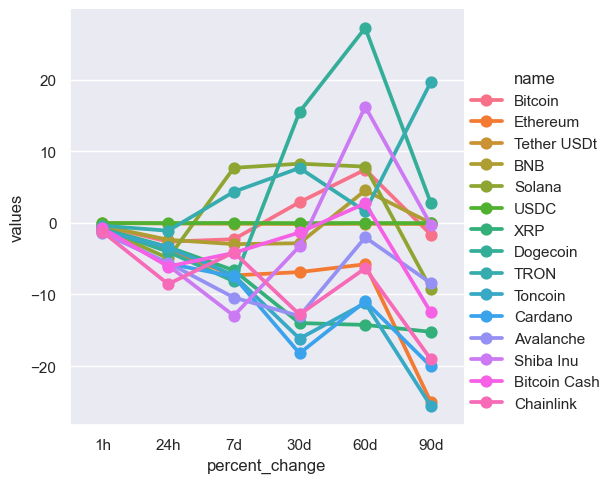

In [61]:
# Make a category plot to show the percent change of each crypto currency over time
sns.catplot(x="percent_change", y="values", hue="name", data=df13, kind="point")

In [67]:
# Show the percent change of bitcoin over time 
df14 = df13[["name", "percent_change", "values"]]
df14 = df14.query("name == 'Bitcoin'")
df14

,name,percent_change,values
0,Bitcoin,1h,-0.42015
1,Bitcoin,24h,-2.62012
2,Bitcoin,7d,-2.27741
3,Bitcoin,30d,2.89455
4,Bitcoin,60d,7.45277
5,Bitcoin,90d,-1.63561


<Axes: xlabel='percent_change', ylabel='values'>

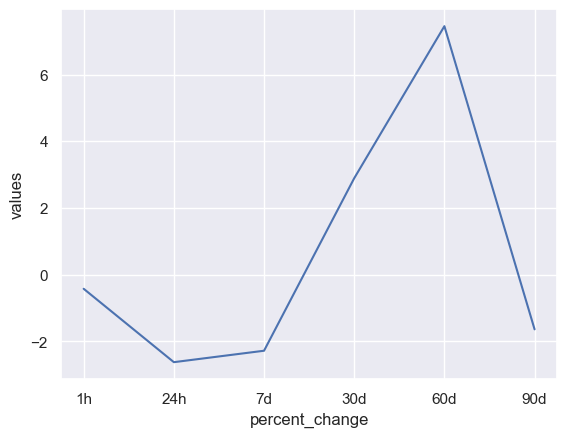

In [75]:
# Visually show the percent change of bitcoin over time
sns.set_theme(style="darkgrid")
sns.lineplot(x="percent_change", y="values", data=df14)